In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

#**Assignment 3: Recurrent Neural Network**

## Data: Beijing PM2.5 Data Data Set

This hourly data set contains the PM2.5 data of US Embassy in Beijing.

Source: https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data

Q1. Please download this dataset from the assignemnt page and show the top five instances.

In [4]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Q2. Create a new column 'Date' by concatenating the year, month and day columns. Then, show the top five instances.

In [5]:
df['Date'] = df['year'].astype(str).str.zfill(4) +\
                        '-' + df['month'].astype(str).str.zfill(2)  + '-' +\
                        df['day'].astype(str).str.zfill(2)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


Q3. Currently, this dataset has hourly values. Aggregate the dataset to become at the *day* lavel by getting the average values of *pm2.5, DEWP, TEMP, PRES, Iws, Is, Ir* (we do not need *No,	year,	month,	day,	hour, cbwd*). Then, show the top five instances.

*Hint*: You can use groupby for data aggregation.

In [6]:
df_daily = df.groupby(["Date"], as_index=False)[['pm2.5', 'DEWP', 'TEMP', 'PRES','Iws','Is','Ir']].mean()
df_daily.head()

,Date,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


Q4. Rename the column names to the follwoing names (to make them more meaninful), and then, show the top five instances:
*Date,	Pollution,	Dew,	Temp,	Press,	Wind_spd,	Snow,	Rain*

In [7]:
df_daily.columns = ['Date', 'Pollution', 'Dew', 'Temp', 'Press', 'Wind_spd', 'Snow', 'Rain']
df_daily.head()

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


Q5. Change the type of the *Date* column to datetime, and then, show the data types.

In [9]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1826 non-null   datetime64[ns]
 1   Pollution  1789 non-null   float64       
 2   Dew        1826 non-null   float64       
 3   Temp       1826 non-null   float64       
 4   Press      1826 non-null   float64       
 5   Wind_spd   1826 non-null   float64       
 6   Snow       1826 non-null   float64       
 7   Rain       1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.3 KB


Q6. Sort the dataset by *Date* and show the top five instances.

In [10]:
df_daily_sorted = df_daily.sort_values(by=['Date']).reset_index(drop=True)
df_daily_sorted.head()

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


Q7. Show the number of missing values per column.

In [11]:
df_daily_sorted.isna().sum()

Date          0
Pollution    37
Dew           0
Temp          0
Press         0
Wind_spd      0
Snow          0
Rain          0
dtype: int64

As you can see, the pollution value for a few data instances (i.e., 37) is null. For example, below, I have shown the data between Jan 20 to Jan 27 of 2010.

In [12]:
df_daily_sorted[(df_daily_sorted['Date']>'2010-01-20') & (df_daily_sorted['Date']<'2010-01-27')]

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
20,2010-01-21,27.041667,-21.166667,-6.125000,1036.375000,59.070833,0.0,0.0
21,2010-01-22,29.416667,-18.791667,-4.583333,1034.375000,93.062083,0.0,0.0
22,2010-01-23,23.176471,-17.708333,-1.916667,1028.000000,43.892083,0.0,0.0
23,2010-01-24,NaN,-17.250000,-3.416667,1021.416667,31.695833,0.0,0.0
24,2010-01-25,NaN,-21.875000,-3.041667,1032.500000,146.202083,0.0,0.0
25,2010-01-26,195.583333,-15.375000,-5.666667,1024.708333,3.146667,0.0,0.0


Q8. For the missing polution values, please impute them by using the polution value from the day before. This method is called *forward* imputation. Please ignore/skip the first data instance on *2010-01-01*. Finally, show the data instances between Jan 20 to Jan 27 of 2010.

In [14]:
df_daily_sorted['Pollution'] = df_daily_sorted['Pollution'].fillna(method='ffill')
df_daily_sorted[(df_daily_sorted['Date']>'2010-01-20') & (df_daily_sorted['Date']<'2010-01-27')]

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
20,2010-01-21,27.041667,-21.166667,-6.125000,1036.375000,59.070833,0.0,0.0
21,2010-01-22,29.416667,-18.791667,-4.583333,1034.375000,93.062083,0.0,0.0
22,2010-01-23,23.176471,-17.708333,-1.916667,1028.000000,43.892083,0.0,0.0
23,2010-01-24,23.176471,-17.250000,-3.416667,1021.416667,31.695833,0.0,0.0
24,2010-01-25,23.176471,-21.875000,-3.041667,1032.500000,146.202083,0.0,0.0
25,2010-01-26,195.583333,-15.375000,-5.666667,1024.708333,3.146667,0.0,0.0


Q9. Print the total number of data instances.

In [15]:
len(df_daily_sorted)

1826

Q10. Drop the first data instance on *2010-01-01* and print the total number of data instances again.

In [17]:
df_daily_sorted.drop(index=0,axis=0,inplace=True)
len(df_daily_sorted)

1825

Q11. Plot *Polution* versus *Date*. In this dataset pollution is measured according to *PM2.5 concentration (ug/m^3)*.

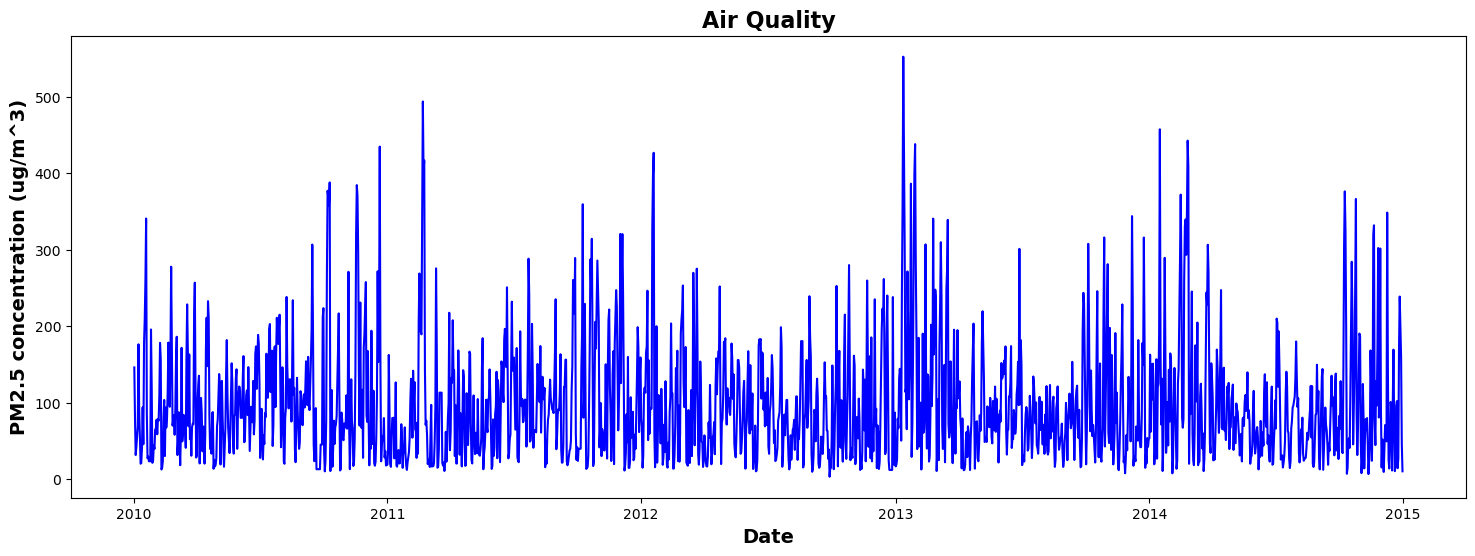

In [18]:
plot_df = pd.DataFrame(df_daily_sorted['Pollution'])
plot_df.index = pd.to_datetime(df_daily_sorted['Date'])

pyplot.figure(figsize=(18, 6))
pyplot.plot(plot_df, color='blue')
pyplot.title('Air Quality', weight='bold', fontsize=16)
pyplot.xlabel('Date', weight='bold', fontsize=14)
pyplot.ylabel('PM2.5 concentration (ug/m^3)', weight='bold', fontsize=14)
pyplot.show()

Q12. Split the data to train and test, by considering the data instances before Jan 1st 2014 in the traning and other instnaces in the testing set. Print the size of your train and test data.

In [19]:
train, test  = df_daily_sorted[df_daily_sorted['Date']<'2014-01-01'], df_daily_sorted[df_daily_sorted['Date']>='2014-01-01']

print(len(train))
print(len(test))

1460
365


## Scaling

Q13. Create x_train and x_test using *Pollution, Dew, Temp, Press,	Wind_spd,	Snow,	Rain*, and, y_train and y_test using *Pollution*. Then, scale the values using *MinMaxScaler* and show the top 10 data instances of x_train.

In [20]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(train.drop(['Date'], axis = 1))
x_test_scaled = x_scaler.transform(test.drop(['Date'], axis = 1))

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(pd.DataFrame(train['Pollution']))
y_test_scaled = y_scaler.transform(pd.DataFrame(test['Pollution']))

pd.DataFrame(x_train_scaled).head(10)

,0,1,2,3,4,5,6
0,0.260227,0.353261,0.197183,0.621417,0.050624,0.05,0.0
1,0.138075,0.322981,0.125000,0.581788,0.150425,1.00,0.0
2,0.051636,0.122671,0.062500,0.713322,0.237544,0.00,0.0
3,0.071881,0.053571,0.000000,0.801012,0.120063,0.00,0.0
4,0.097282,0.069876,0.040493,0.803541,0.036874,0.00,0.0
5,0.120181,0.115683,0.041373,0.810287,0.018807,0.00,0.0
6,0.315275,0.192547,0.058099,0.687184,0.001053,0.00,0.0
7,0.155666,0.207298,0.112676,0.708263,0.025584,0.00,0.0
8,0.098798,0.214286,0.120599,0.778246,0.034501,0.00,0.0
9,0.031012,0.125776,0.121479,0.815346,0.087067,0.00,0.0


Q14. Show the top 10 data instances of y_train.

In [21]:
pd.DataFrame(y_train_scaled).head(10)

,0
0,0.260227
1,0.138075
2,0.051636
3,0.071881
4,0.097282
5,0.120181
6,0.315275
7,0.155666
8,0.098798
9,0.031012


## Shifting

Q15. We want to use the past seven days of data to predict the pollution for a given day. Please shift the data accordingly, and print the shape of the **shifted** x_train.

In [25]:
def create_shifted_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [26]:
time_steps = 7
num_features = 7 

X_train, y_train = create_shifted_dataset(x_train_scaled, y_train_scaled, time_steps)
X_test, y_test = create_shifted_dataset(x_test_scaled, y_test_scaled, time_steps)

X_train.shape

(1453, 7, 7)

Q16. Print the shape of y_train.

In [27]:
y_train.shape

(1453, 1)

Q17. Print the first data instance in the shifted x_train.

In [28]:
X_train[0]

array([[0.26022714, 0.35326087, 0.1971831 , 0.62141653, 0.05062437,
        0.05      , 0.        ],
       [0.13807507, 0.32298137, 0.125     , 0.58178752, 0.15042465,
        1.        , 0.        ],
       [0.05163598, 0.12267081, 0.0625    , 0.71332209, 0.23754358,
        0.        , 0.        ],
       [0.07188092, 0.05357143, 0.        , 0.8010118 , 0.12006321,
        0.        , 0.        ],
       [0.09728188, 0.06987578, 0.04049296, 0.80354132, 0.03687449,
        0.        , 0.        ],
       [0.12018066, 0.11568323, 0.04137324, 0.81028668, 0.01880726,
        0.        , 0.        ],
       [0.31527519, 0.19254658, 0.05809859, 0.68718381, 0.00105317,
        0.        , 0.        ]])

 Q18. Print the first data instance in the y_train.

In [29]:
y_train[0]

array([0.15566618])

# Model

Q19. Create an RNN prediction model with two GRU layers, one with 50 and one with 100 nodes.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 50)             8850      
                                                                 
 gru_1 (GRU)                 (None, 100)               45600     
                                                                 
 final (Dense)               (None, 1)                 101       
                                                                 
Total params: 54551 (213.09 KB)
Trainable params: 54551 (213.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q20. Compile your RNN model with *adam* optimizer, *MSE* loss function and *MAE* as an extra metric. Please use the *batch size* of 16 with 10 *epochs*, and 10% *validation* split.

Epoch 1/10
82/82 [==============================] - 12s 16ms/step - loss: 0.0193 - mae: 0.1051 - val_loss: 0.0144 - val_mae: 0.0925
Epoch 2/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0150 - mae: 0.0926 - val_loss: 0.0127 - val_mae: 0.0880
Epoch 3/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0136 - mae: 0.0882 - val_loss: 0.0111 - val_mae: 0.0801
Epoch 4/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0131 - mae: 0.0848 - val_loss: 0.0114 - val_mae: 0.0793
Epoch 5/10
82/82 [==============================] - 1s 6ms/step - loss: 0.0135 - mae: 0.0877 - val_loss: 0.0133 - val_mae: 0.0890
Epoch 6/10
82/82 [==============================] - 1s 6ms/step - loss: 0.0131 - mae: 0.0853 - val_loss: 0.0126 - val_mae: 0.0842
Epoch 7/10
82/82 [==============================] - 1s 6ms/step - loss: 0.0129 - mae: 0.0844 - val_loss: 0.0116 - val_mae: 0.0819
Epoch 8/10
82/82 [==============================] - 1s 6ms/step - loss: 0.0127 - mae: 0.

## Performance

Q21. Show the performance on the test dataset.

12/12 [==============================] - 0s 3ms/step - loss: 0.0140 - mae: 0.0871


## Post-analysis

Q22. Plot the RNN model's predicted values on the training dataset as well as their actual values.

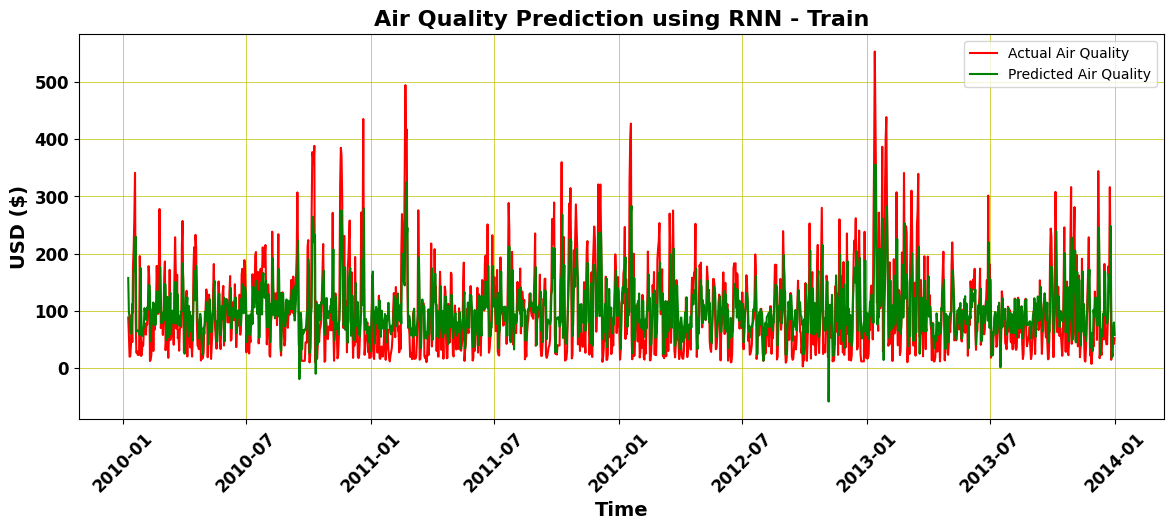

Q23. Plot the RNN model's predicted values on the testing dataset as well as their actual values.

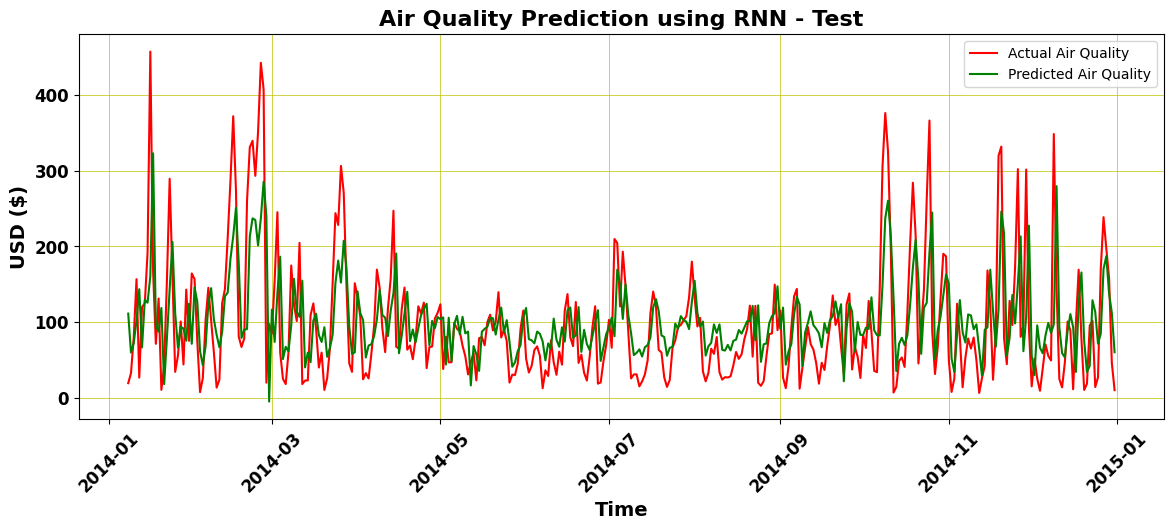